# Problem 6-15

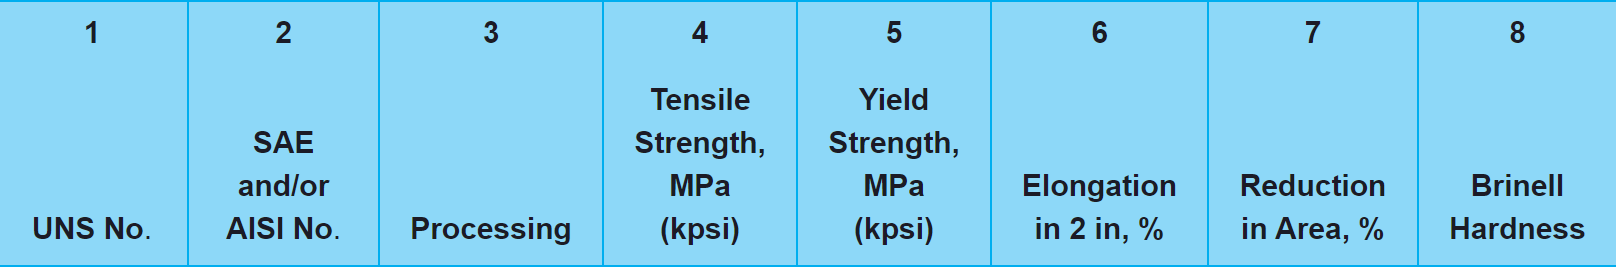

In [103]:
from IPython.display import Image
import numpy as np
Image(filename="Figures/TableA20Header.png")

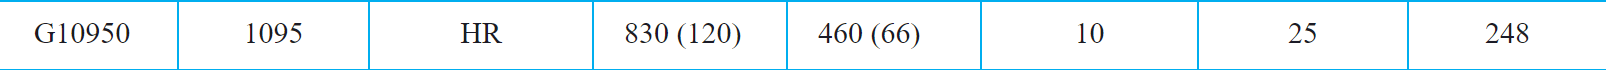

In [104]:
Image(filename="Figures/aisi1095.png")

## Defining all variables

In [105]:
d = 2 # in
dgroove = 1.8 # in
radius = 0.1 # in
# Non rotating
Mmax = 25000 # lbf . in
Mmin = 0 # lbf . in
MAmplitude = (Mmax - Mmin) /2
MMean = (Mmax + Mmin)/2
Sut = 120 # kpsi
Sy = 66 # kpsi
# Groove has been machined (probably means to use a different value for kb)

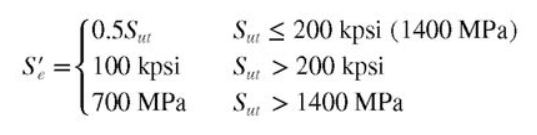

In [106]:
Image(filename="Figures/Eq6_10.png")

## Since $S_{ut} \geq 200 kpsi$
## $S'_e = 0.5 * Sut$

In [107]:
Seprime = 0.5 * Sut
# print(Seprime)

# Marin Factors
### Ka - Surface

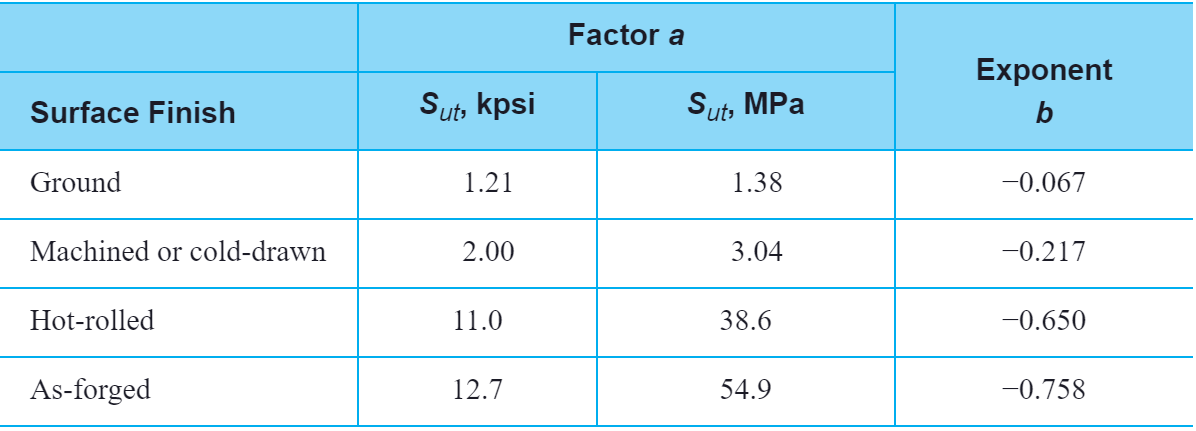

In [108]:
Image(filename="Figures/Table6_2.png", width=0.1)

In [109]:
aMachined = 2 # kpsi
bMachined = -0.217
aHotrolled = 11 # kpsi
bHotrolled = -0.65
kaGroove = aMachined*Sut**bMachined
ka = aHotrolled*Sut**bHotrolled

## Kb - Size factor

### Diameter needs to be adjusted because non-rotating

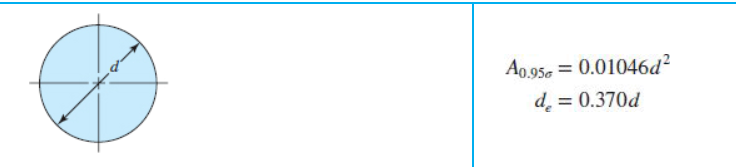

In [110]:
Image(filename="Figures/Table6_3Round.png")

In [111]:
de = 0.37*d
print(de)

0.74


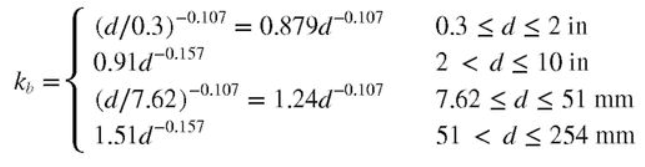

In [112]:
Image(filename="Figures/Eq6_19.png")

In [113]:
Kb = (d/0.3)**(-0.107)

There is no axial loading, only bending, thus Kc = 1

In [114]:
SeGroove = kaGroove*Kb*Seprime
Se = ka*Kb*Seprime

# Now we find $K_t$ from Figure A-15-14

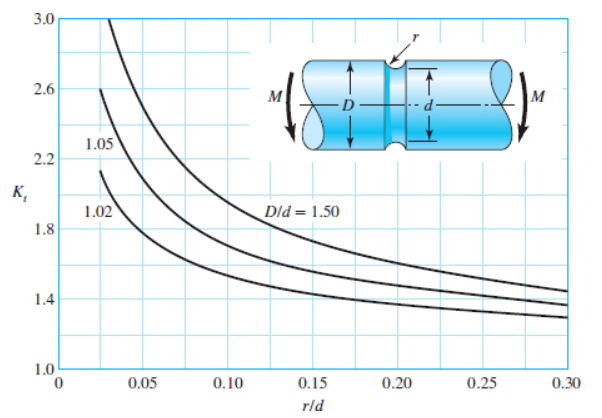

In [115]:
Image(filename="Figures/FigureA_15_14.png")

In [116]:
x = radius/dgroove
a = d/dgroove
print(x, a)

0.05555555555555556 1.1111111111111112


In [117]:
Kt = 2.2

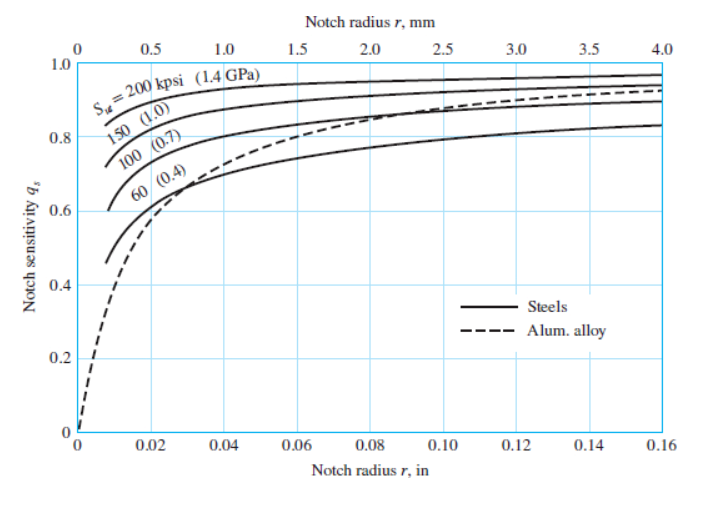

In [118]:
Image(filename="Figures/Figure6_26.png")

In [119]:
q = 0.9
Kf = 1 + q*(Kt-1)

## Now the $ \sigma_a $ and $ \sigma_m $ will be determined and adjusted using $ K_f $
### The equation for bending on a round specimen is $ \sigma = \frac{32 M}{\pi d^3}$

In [120]:
SigmaM0 = 32*MMean/(np.pi*de**3)
SigmaM = Kf*SigmaM0
SigmaA0 = 32*MAmplitude/(np.pi*de**3)
SigmaA = Kf*SigmaA0
print(SigmaM, SigmaA)

653549.2105722117 653549.2105722117


In [121]:
from Source.Fatigue import Goodman
n = Goodman(SigmaA, SigmaM, SeGroove, Sut)
print(n)

4.114934337864444e-05


# Calculating cycles

$ a = \frac{(f S_{ut})^2}{S_e}$

$ b = -\frac{1}{3} log(\frac{f S_{ut}}{S_e})$

$ N = (\frac{\sigma_{ar}}{a})^{1/b} $

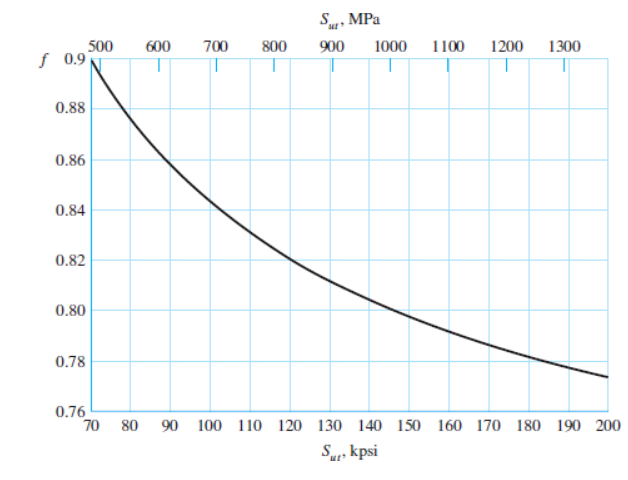

In [122]:
Image(filename="Figures/Figure6_23.png")

In [124]:
from Source.Fatigue import Cycles
f = 0.82
Sf = SigmaA/(1-SigmaM/Sut)
N = Cycles(Sf, f, Sut, Se)

ImportError: cannot import name 'Cycles' from 'Source.Fatigue' (c:\Repos\Engineering\ME370MachineDesign\Homework\Source\Fatigue.py)